In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from sklearn import linear_model

test = pd.read_csv('c:\\users\\chris\\csv files\\test.csv')
train = pd.read_csv('c:\\users\\chris\\csv files\\train.csv')
%cd c:\\users\\chris\\mypythonscripts
train2 = train.copy()
train2 = train2.drop('Id',axis=1)

c:\users\chris\mypythonscripts


In [2]:
train.drop(train.index[1298], inplace = True)
train.drop(train.index[523], inplace = True)
train.drop(train.index[1182], inplace = True)

In [3]:
full_df = pd.concat([train, test])

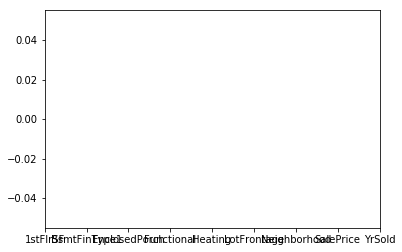

In [4]:

full_df[full_df.isnull() == True].sum().plot()

In [7]:
full_df.groupby(['Neighborhood'])['LotFrontage'].transform('mean').round().unique()

array([ 71.,  72.,  70.,  92.,  75.,  65.,  82.,  62.,  56.,  84.,  26.,
        81.,  74.,  88.,  28.,  47.,  22.,  59.,  27.])

In [5]:
full_df['PoolQC'].fillna('No Pool',inplace = True)
full_df['MiscFeature'].fillna('None',inplace = True)
full_df['Alley'].fillna('No Alley Access',inplace = True)
full_df['Fence'].fillna('No Fence',inplace = True)
full_df['FireplaceQu'].fillna('No Fireplace',inplace = True)
full_df['LotFrontage'] = full_df['LotFrontage'].fillna(full_df.groupby(['Neighborhood'])['LotFrontage'].transform('mean').round())
full_df['GarageYrBlt'].fillna('No Garage',inplace = True)
full_df['GarageType'].fillna('No Garage',inplace = True)
full_df['GarageFinish'].fillna('No Garage',inplace = True)
full_df['GarageQual'].fillna('No Garage',inplace = True)
full_df['GarageCond'].fillna('No Garage',inplace = True)
full_df['BsmtFinType2'].fillna('No Garage',inplace = True)
full_df['BsmtExposure'].fillna('No Garage',inplace = True)
full_df['BsmtFinType1'].fillna('No Garage',inplace = True)
full_df['BsmtCond'].fillna('No Garage',inplace = True)
full_df['BsmtQual'].fillna('No Garage',inplace = True)
full_df['MasVnrArea'].fillna(0,inplace = True)
full_df['MasVnrType'].fillna('None',inplace = True)
full_df['Electrical'].fillna('SBrkr', inplace = True)

In [6]:
full_df['BsmtFinSF1'] = full_df['BsmtFinSF1'].fillna(full_df.groupby(['Neighborhood'])['BsmtFinSF1'].transform('mean'))
full_df['BsmtFinSF2'] = full_df['BsmtFinSF2'].fillna(full_df.groupby(['Neighborhood'])['BsmtFinSF2'].transform('mean'))
full_df['BsmtUnfSF'] = full_df['BsmtUnfSF'].fillna(full_df.groupby(['Neighborhood'])['BsmtUnfSF'].transform('mean'))
full_df['TotalBsmtSF'] = full_df['TotalBsmtSF'].fillna(full_df.groupby(['Neighborhood'])['TotalBsmtSF'].transform('mean'))
full_df['BsmtHalfBath'] = full_df['BsmtHalfBath'].fillna(full_df.groupby(['Neighborhood'])['BsmtHalfBath'].transform('mean'))
full_df['BsmtFullBath'] = full_df['BsmtFullBath'].fillna(full_df.groupby(['Neighborhood'])['BsmtFullBath'].transform('mean'))
full_df['BsmtFullBath'] = full_df['BsmtFullBath'].fillna(full_df.groupby(['Neighborhood'])['BsmtFullBath'].transform('mean'))
full_df['GarageCars'] = full_df['GarageCars'].fillna(full_df.groupby(['Neighborhood'])['GarageCars'].transform('mean'))
full_df['GarageArea'] = full_df['GarageArea'].fillna(full_df.groupby(['Neighborhood'])['GarageArea'].transform('mean'))
full_df['Exterior1st'] = full_df['Exterior1st'].fillna('VinylSd')
full_df['Exterior2nd'] = full_df['Exterior2nd'].fillna('VinylSd')
full_df['Functional'] = full_df['Functional'].fillna('Typ')
full_df.KitchenQual.fillna(lambda x: random.choice(full_df[full_df['KitchenQual'] != np.nan]["KitchenQual"]), inplace =True)
full_df['MSZoning'] = full_df['MSZoning'].fillna('RL')
full_df['SaleType'] = full_df['SaleType'].fillna('WD')
full_df['Utilities'] = full_df['Utilities'].fillna('AllPub')

In [7]:
full_df = full_df.drop('SalePrice', axis=1)

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)

In [9]:
sum(full_df.isnull().sum())

0

In [18]:
full_df.Exterior1st.mode()

0    VinylSd
dtype: object

In [11]:
full_df.Exterior2nd.mode()

0    VinylSd
dtype: object

In [12]:
full_df.Functional.mode()

0    Typ
dtype: object

In [13]:
full_df.KitchenQual.value_counts()

TA                                           1491
Gd                                           1151
Ex                                            203
Fa                                             70
<function <lambda> at 0x00000000058D1730>       1
Name: KitchenQual, dtype: int64

In [14]:
full_df.MSZoning.value_counts()

RL         2266
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [15]:
full_df.SaleType.value_counts()

WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [16]:
full_df.Utilities.value_counts()

AllPub    2915
NoSeWa       1
Name: Utilities, dtype: int64

In [10]:
# Make copy dataframe for non-normalized data
full_df2 = full_df.copy()

# Normalizing Data

In [11]:
import scipy.stats as st
from scipy.stats import boxcox
import seaborn as sns

In [12]:
full_df.GrLivArea = np.log1p(train2.GrLivArea)
full_df.MasVnrArea = np.log1p(train2.MasVnrArea)
full_df.TotalBsmtSF = np.log1p(train2.TotalBsmtSF)
full_df.LotFrontage = np.log1p(train2.LotFrontage)
full_df.LotArea = np.log1p(train2.LotArea)
full_df.SalePrice = np.log1p(train2.SalePrice)

# Dummifying

In [13]:
dummy_train = pd.get_dummies(full_df, drop_first=True)

In [14]:
dummy_train.isnull().sum()

1stFlrSF                      0
2ndFlrSF                      0
3SsnPorch                     0
BedroomAbvGr                  0
BsmtFinSF1                    0
BsmtFinSF2                    0
BsmtFullBath                  0
BsmtHalfBath                  0
BsmtUnfSF                     0
EnclosedPorch                 0
Fireplaces                    0
FullBath                      0
GarageArea                    0
GarageCars                    0
GrLivArea                     0
HalfBath                      0
Id                            0
KitchenAbvGr                  0
LotArea                       0
LotFrontage                 518
LowQualFinSF                  0
MSSubClass                    0
MasVnrArea                   16
MiscVal                       0
MoSold                        0
OpenPorchSF                   0
OverallCond                   0
OverallQual                   0
PoolArea                      0
ScreenPorch                   0
TotRmsAbvGrd                  0
TotalBsm

In [22]:
dummy_2 = pd.get_dummies(full_df2, drop_first=True)

In [23]:
dummy_2.isnull().sum()

1stFlrSF                    0
2ndFlrSF                    0
3SsnPorch                   0
BedroomAbvGr                0
BsmtFinSF1                  0
BsmtFinSF2                  0
BsmtFullBath                0
BsmtHalfBath                0
BsmtUnfSF                   0
EnclosedPorch               0
Fireplaces                  0
FullBath                    0
GarageArea                  0
GarageCars                  0
GrLivArea                   0
HalfBath                    0
Id                          0
KitchenAbvGr                0
LotArea                     0
LotFrontage                 0
LowQualFinSF                0
MSSubClass                  0
MasVnrArea                  0
MiscVal                     0
MoSold                      0
OpenPorchSF                 0
OverallCond                 0
OverallQual                 0
PoolArea                    0
ScreenPorch                 0
TotRmsAbvGrd                0
TotalBsmtSF                 0
WoodDeckSF                  0
YearBuilt 

In [14]:
# Selecting the train rows
train_df = dummy_train.head(1457)

In [15]:
# Selecting the test rows
test_df = dummy_train.tail(1459)

In [33]:
train_df2 = dummy_2.head(1457)

In [34]:
test_df2 = dummy_2.tail(1549)

# Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
y = train.SalePrice
X = train_df.loc[:, train_df.columns != 'Id']
X_test = test_df.loc[:, test_df.columns != 'Id']

In [35]:
X_2 = train_df2.loc[:, train_df2.columns != 'Id']
X_2test = test_df2.loc[:, test_df2.columns != 'Id']

In [26]:
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size = 0.25,random_state=0)

In [36]:
train_X2, val_X2, train_y2, val_y2 = train_test_split(X_2, y, test_size = 0.25, random_state=0)

In [19]:
lin_reg = LinearRegression()

In [20]:
lin_reg.fit(train_X,train_y, sample_weight=None)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [21]:
lin_reg2 = LinearRegression()

In [38]:
lin_reg2.fit(train_X2, train_y2, sample_weight=None)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
lin_reg.predict(val_X)

array([  1.35090453e+05,   1.77966062e+05,   1.05036391e+05,
         1.42370672e+05,   2.98299766e+05,   1.51537109e+05,
         1.84818562e+05,   1.31236812e+05,   1.31516234e+05,
         2.73269781e+05,   1.96226031e+05,   2.21537594e+05,
         1.75821953e+05,   1.47800031e+05,   9.32793750e+04,
         1.55072562e+05,   1.98401453e+05,   8.16045000e+04,
         1.50930625e+05,   4.22040062e+05,   2.98011000e+05,
         1.60866562e+05,   3.01567766e+05,   8.62269062e+04,
         1.11413766e+05,   1.23341844e+05,   1.13916875e+05,
         7.41444844e+04,   1.47935844e+05,   2.96649766e+05,
         1.69214438e+05,   2.48169906e+05,   1.72084969e+05,
         1.89038078e+05,   1.82864904e+13,   1.64132062e+05,
         8.25514219e+04,   1.76419391e+05,   1.49595922e+05,
         1.05521250e+05,   1.22162641e+05,   2.02877828e+05,
         2.75085047e+05,   1.08857922e+05,   1.81232250e+05,
         1.28220359e+05,   2.72892734e+05,   1.21528359e+05,
         1.09745328e+05,

In [24]:
lin_reg.score(val_X,val_y)

-155899987302018.0

In [39]:
lin_reg2.predict(val_X2)

array([  1.36707042e+05,   1.80802931e+05,   1.01894726e+05,
         1.39066700e+05,   3.01438476e+05,   1.52800040e+05,
         1.88401488e+05,   1.31868115e+05,   1.34477615e+05,
         2.69851158e+05,   1.86413621e+05,   2.21144205e+05,
         1.79049317e+05,   1.54281218e+05,   8.76018672e+04,
         1.55707146e+05,   1.97690613e+05,   8.42690805e+04,
         1.47692812e+05,   4.27539843e+05,   2.95224217e+05,
         1.59428071e+05,   3.02876265e+05,   9.15271089e+04,
         1.11140352e+05,   1.23324857e+05,   1.09745899e+05,
         4.86447963e+04,   1.49969207e+05,   2.89862919e+05,
         1.66077499e+05,   2.37200876e+05,   1.71825389e+05,
         1.94671546e+05,  -4.03368309e+08,   1.57485828e+05,
         7.61059560e+04,   1.78026443e+05,   1.55671784e+05,
         9.74933680e+04,   1.15144086e+05,   1.99649448e+05,
         2.76485436e+05,   1.11284904e+05,   1.99541864e+05,
         1.32514340e+05,   2.72136697e+05,   1.21004445e+05,
         1.14148027e+05,

In [41]:
lin_reg2.score(val_X2, val_y2)

-13393505.663228959

In [71]:
lin_reg3 = LinearRegression(normalize=True)

In [72]:
lin_reg3.fit(train_X2, train_y2,sample_weight=None)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [74]:
lin_reg3.predict(val_X2)

array([  1.36128000e+05,   1.80352000e+05,   1.00544000e+05,
         1.39264000e+05,   3.00480000e+05,   1.53344000e+05,
         1.88256000e+05,   1.33408000e+05,   1.34560000e+05,
         2.69856000e+05,   1.88672000e+05,   2.22144000e+05,
         1.78688000e+05,   1.54272000e+05,   8.79040000e+04,
         1.55520000e+05,   1.96800000e+05,   8.40960000e+04,
         1.49056000e+05,   4.27744000e+05,   2.95488000e+05,
         1.59520000e+05,   3.02976000e+05,   8.81920000e+04,
         1.11232000e+05,   1.24544000e+05,   1.10720000e+05,
         4.89280000e+04,   1.49504000e+05,   2.91872000e+05,
         1.66016000e+05,   2.37088000e+05,   1.68256000e+05,
         1.95712000e+05,  -2.98844366e+18,   1.57856000e+05,
         7.28000000e+04,   1.77152000e+05,   1.56576000e+05,
         9.75680000e+04,   1.15136000e+05,   2.01952000e+05,
         2.75776000e+05,   1.10880000e+05,   1.96640000e+05,
         1.33280000e+05,   2.73408000e+05,   1.20960000e+05,
         1.13792000e+05,

In [75]:
lin_reg3.score(val_X2,val_y2)

-6.4740069091476643e+24

In [10]:
lin_reg.coef_

NameError: name 'lin_reg' is not defined

# Ridge

In [23]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [60]:
ridge_reg = RidgeCV(cv=12)

ridge_reg.fit(train_X, train_y)

ridge_reg.predict(val_X)

ridge_reg.score(val_X, val_y)

0.89551384033670745

In [59]:
ridge_reg

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=12, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [62]:
ridge_reg2 = RidgeCV(cv=12)

ridge_reg2.fit(train_X2, train_y2)

ridge_reg2.predict(val_X2)

ridge_reg2.score(val_X2, val_y2)

0.91228513286015223

In [67]:
ridge_reg3 = RidgeCV(cv=12, normalize=True)

ridge_reg3.fit(train_X2, train_y2)

ridge_reg3.predict(val_X2)

ridge_reg3.score(val_X2, val_y2)

0.89725865085718537

# Lasso

In [28]:
lasso_reg = LassoCV(cv=10,alphas=(0.1,1,10))

lasso_reg.fit(train_X, train_y)

lasso_reg.predict(val_X)

lasso_reg.score(val_X, val_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [69]:
lasso_reg2 = LassoCV(cv=10)

lasso_reg2.fit(train_X2, train_y2)

lasso_reg2.predict(val_X2)

lasso_reg2.score(val_X2, val_y2)

0.79627742009337477

In [70]:
lasso_reg3 = LassoCV(cv=10, normalize=True)

lasso_reg3.fit(train_X2, train_y2)

lasso_reg3.predict(val_X2)

lasso_reg3.score(val_X2, val_y2)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.90348307816629148

# Predicting on the test values

In [46]:
submission4 = pd.DataFrame([test_df.Id, lin_reg2.predict(X_2test)]).T

In [47]:
submission5 = pd.DataFrame([test_df.Id, ridge_reg2.predict(X_2test)]).T

In [48]:
submission6 = pd.DataFrame([test_df.Id, lasso_reg.predict(X_2test)]).T

In [28]:
submission7 = pd.DataFrame([test_df.Id, lin_reg.predict(X_test)]).T

In [29]:
submission8 = pd.DataFrame([test_df.Id,ridge_reg.predict(X_test)]).T

In [30]:
submission9 = pd.DataFrame([test_df.Id,lasso_reg.predict(X_test)]).T

In [76]:
submission10 = pd.DataFrame([test_df.Id, lin_reg3.predict(X_2test)]).T

In [78]:
submission11 = pd.DataFrame([test_df.Id, ridge_reg3.predict(X_2test)]).T

In [79]:
submission12 = pd.DataFrame([test_df.Id, lasso_reg3.predict(X_2test)]).T

In [30]:
submission7.to_csv('c:\\users\\chris\\csv files\\submission7.csv')

In [31]:
submission8.to_csv('c:\\users\\chris\\csv files\\submission8.csv')

In [32]:
submission9.to_csv('c:\\users\\chris\\csv files\\submission9.csv')

In [81]:
submission10.to_csv('c:\\users\\chris\\csv files\\submission10.csv')

In [82]:
submission11.to_csv('c:\\users\\chris\\csv files\\submission11.csv')

In [83]:
submission12.to_csv('c:\\users\\chris\\csv files\\submission12.csv')

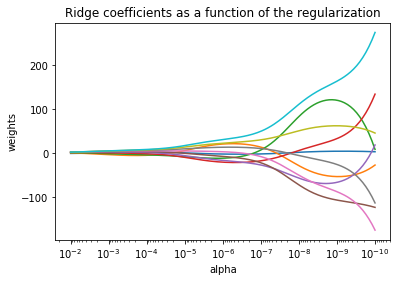

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()